<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Papers/blob/main/DenseNet_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.11.0'

#Data 
[Source](https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification
!unzip \*.zip && rm .zip

In [30]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/Plants_2/train/',
    labels = 'inferred',
    label_mode = 'categorical', # categorical, binary
    color_mode = 'rgb', #grayscale
    batch_size = 32,
    image_size = (128, 128), #Reshape if not in this size
    shuffle=True,
    seed=32,
    validation_split=None,
    subset=None)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/Plants_2/valid/',
    labels = 'inferred',
    label_mode = 'categorical', # categorical, binary
    color_mode = 'rgb', #grayscale
    batch_size = 32,
    image_size = (128, 128), #Reshape if not in this size
    shuffle=True,
    seed=32,
    validation_split=None,
    subset=None)


test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/Plants_2/test/',
    labels = 'inferred',
    label_mode = 'categorical', # categorical, binary
    color_mode = 'rgb', #grayscale
    batch_size = 32,
    image_size = (128, 128), #Reshape if not in this size
    shuffle=True,
    seed=32,
    validation_split=None,
    subset=None)

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


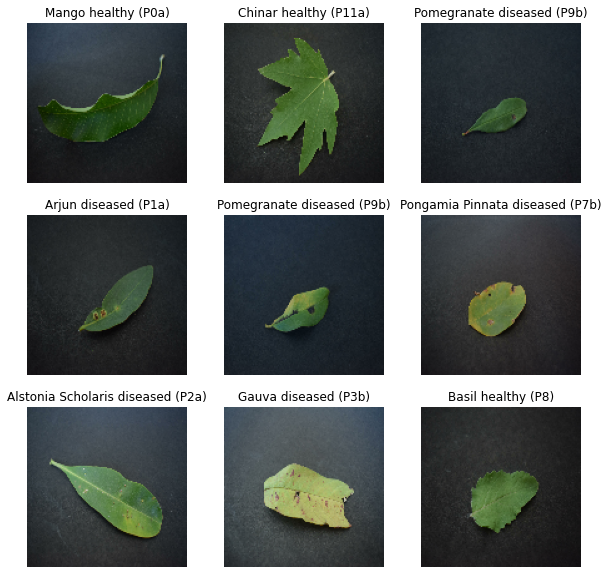

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1/255,
#     rotation_range=5,
#     zoom_range = (0.95, 0.95),
#     horizontal_flip=False,
#     vertical_flip=False,
#     data_format='channels_last', #channels_last
#     validation_split=0.0,
# )

# train_gen = train_datagen.flow_from_directory('/content/Plants_2/train/',
#                                         target_size=(128, 128),
#                                         batch_size=32,
#                                         color_mode='rgb',
#                                         class_mode='categorical', #binary, sparse
#                                         shuffle=True,
#                                         subset=None)


# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# validation_gen = test_datagen.flow_from_directory('/content/Plants_2/test/',
#                                         target_size=(128, 128),
#                                         batch_size=32,
#                                         color_mode='rgb',
#                                         class_mode='categorical', #binary, sparse
#                                         shuffle=True,
#                                         subset=None)

In [ ]:
# for img_batch, label_batch in train_gen:
#   print(img_batch.shape, label_batch.shape)
#   break

In [15]:
# tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [16]:
train_ds.class_names
# train_gen.class_indices

['Alstonia Scholaris diseased (P2a)',
 'Alstonia Scholaris healthy (P2b)',
 'Arjun diseased (P1a)',
 'Arjun healthy (P1b)',
 'Bael diseased (P4b)',
 'Basil healthy (P8)',
 'Chinar diseased (P11b)',
 'Chinar healthy (P11a)',
 'Gauva diseased (P3b)',
 'Gauva healthy (P3a)',
 'Jamun diseased (P5b)',
 'Jamun healthy (P5a)',
 'Jatropha diseased (P6b)',
 'Jatropha healthy (P6a)',
 'Lemon diseased (P10b)',
 'Lemon healthy (P10a)',
 'Mango diseased (P0b)',
 'Mango healthy (P0a)',
 'Pomegranate diseased (P9b)',
 'Pomegranate healthy (P9a)',
 'Pongamia Pinnata diseased (P7b)',
 'Pongamia Pinnata healthy (P7a)']

In [35]:
# class DenseNet(tf.keras.Model):
#   def __init__(self, n_blocks, filters):
#     super(DenseNet, self).__init__()
#     self.filters = filters
#     self.n_blocks = n_blocks


#   def dense_block(self, x, n_layers, layer_name, drop_rate=0.2, kernel_1=1, kernel_2=3):
#     with tf.name_scope(layer_name):   #Remove or Not????
      
#       previous_input = x
#       for i in range(n_layers):

#         x = tf.keras.layers.BatchNormalization(axis=-1, name=layer_name+layer_name+'_BatchNorm_1')(x),
#         x = tf.keras.layers.Conv2D(filters=4*self.filters, kernel_size=kernel_1, activation='relu', name=layer_name+'_1X1Conv')(x),
#         x = tf.keras.layers.Dropout(rate=drop_rate, name=layer_name+'_Drop_1')(x),
#         x = tf.keras.layers.BatchNormalization(axis=-1, name=layer_name+'_BatchNorm_2')(x),
#         x = tf.keras.layers.Conv2D(filters=self.filters, kernel_size=kernel_2, activation='relu', name=layer_name+'_3X3Conv')(x),
#         x = tf.keras.layers.Dropout(rate=drop_rate, name=layer_name+'_Drop_2')(x)

#         x = tf.keras.layers.Concatenate(axis=-1)([x, previous_input])  #Concatenate channel wise
#         previous_input = x

#     return x


#   def transition_layer(self, x, scope, kernel=1, drop_rate=0.2):
#     with tf.name_scope(scope):
      
#       x = tf.keras.layers.BatchNormalization(axis=-1, name=scope+'_BatchNorm')(x)
#       x = tf.keras.layers.Conv2D(filters=self.filters, kernel=kernel, activation='relu', name=scope+'_1X1Conv')(x)
#       x = tf.keras.layers.Dropout(rate=drop_rate)
#       x = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)
#       # x = tf.keras.layers.GlobalAveragePooling2D(pool_size=2, strides=2)
#       # x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)
#       return x


#   def Dense_net(self, input_x):
#     x = tf.keras.layers.Conv2D(filters=self.filters, activation='relu', kernel_size=3, input_shape=(128, 128, 3), name='Input_layer')(input_x)
#     x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
#     # x = tf.keras.layers.GlobalMaxPool2D(pool_size=3, strides=2)(x)

#     for i in range(self.n_blocks): #6-->12-->48
#       x = self.dense_block(x, 4, f'DenseLayer_{i}')
#       x = self.transition_layer(x, f'Transition_Layer{i}')

#     # print(input_x)
#     x = self.dense_block(x, 32, 'Dense_Final')

#     x = tf.keras.layers.BatchNormalization(axis=-1, name='Linear_batch')
#     x = tf.keras.layers.ReLU()(x)
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     x = tf.keras.layers.Flatten()(x)
#     x = tf.keras.layers.Dense()(x)

#     return x
  
#   def call(self, x):
#     return self.Dense_net(x)

In [40]:
filters =  12
n_blocks = 4


def dense_block(x, n_layers, layer_name, drop_rate=0.2, kernel_1=1, kernel_2=3):
    
  previous_input = x
  for i in range(n_layers):

    x = tf.keras.layers.BatchNormalization(axis=-1, name=layer_name+layer_name+'_BatchNorm_1')(x),
    x = tf.keras.layers.Conv2D(filters=4*filters, kernel_size=kernel_1, activation='relu', name=layer_name+'_1X1Conv')(x),
    x = tf.keras.layers.Dropout(rate=drop_rate, name=layer_name+'_Drop_1')(x),
    x = tf.keras.layers.BatchNormalization(axis=-1, name=layer_name+'_BatchNorm_2')(x),
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_2, activation='relu', name=layer_name+'_3X3Conv')(x),
    x = tf.keras.layers.Dropout(rate=drop_rate, name=layer_name+'_Drop_2')(x)

    x = tf.keras.layers.Concatenate(axis=-1)([x, previous_input])  #Concatenate channel wise
    previous_input = x

  return x


def transition_layer(x, scope, kernel=1, drop_rate=0.2):

  x = tf.keras.layers.BatchNormalization(axis=-1, name=scope+'_BatchNorm')(x)
  x = tf.keras.layers.Conv2D(filters=filters, kernel=kernel, activation='relu', name=scope+'_1X1Conv')(x)
  x = tf.keras.layers.Dropout(rate=drop_rate)
  x = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)
  # x = tf.keras.layers.GlobalAveragePooling2D(pool_size=2, strides=2)
  # x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)
  return x


x = tf.keras.layers.Conv2D(filters=filters, activation='relu', kernel_size=3, input_shape=(128, 128, 3), name='Input_layer')(input_x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
# x = tf.keras.layers.GlobalMaxPool2D(pool_size=3, strides=2)(x)

for i in range(n_blocks): #6-->12-->48
  x = dense_block(x, 4, f'DenseLayer_{i}')
  x = transition_layer(x, f'Transition_Layer{i}')

# print(input_x)
x = dense_block(x, 32, 'Dense_Final')

x = tf.keras.layers.BatchNormalization(axis=-1, name='Linear_batch')
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense()(x)



In [41]:
# model = DenseNet(train_gen, 12, 4)
input_x = tf.keras.Input(shape=(128, 128, 3))

# model = DenseNet(12, 4)(input_x)

# model.build([None, 224, 224, 3])
# type(train_ds.take(0)[:5])

In [27]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
x = tf.keras.layers.Conv2D(filters=filters, activation='relu', kernel_size=3, input_shape=(128, 128, 3), name='Input_layer')(input_x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2)(x)
# x = tf.keras.layers.GlobalMaxPool2D(pool_size=3, strides=2)(x)

for i in range(n_blocks): #6-->12-->48
  x = dense_block(x, 4, f'DenseLayer_{i}')
  x = transition_layer(x, f'Transition_Layer{i}')

# print(input_x)
x = dense_block(x, 32, 'Dense_Final')

x = tf.keras.layers.BatchNormalization(axis=-1, name='Linear_batch')
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense()(x)


In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
 
class LeNet5(tf.keras.Model):
  def __init__(self):
    super(LeNet5, self).__init__()
    #creating layers in initializer
    self.conv1 = Conv2D(filters=6, kernel_size=(5,5), padding="same", activation="relu")
    self.max_pool2x2 = MaxPool2D(pool_size=(2,2))
    self.conv2 = Conv2D(filters=16, kernel_size=(5,5), padding="same", activation="relu")
    self.conv3 = Conv2D(filters=120, kernel_size=(5,5), padding="same", activation="relu")
    self.flatten = Flatten()
    self.fc2 = Dense(units=84, activation="relu")
    self.fc3=Dense(units=10, activation="softmax")
 
  def call(self, input_tensor):
    #don't add layers here, need to create the layers in initializer, otherwise you will get the tf.Variable can only be created once error
    x = self.conv1(input_tensor)
    x = self.max_pool2x2(x)
    x = self.conv2(x)
    x = self.max_pool2x2(x)
    x = self.conv3(x)
    x = self.flatten(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x  
input_layer = Input(shape=(32,32,3,))
x = LeNet5()(input_layer)
model = Model(inputs=input_layer, outputs=x)
print(model.summary(expand_nested=True))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 le_net5 (LeNet5)            (None, 10)                697046    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv2d (Conv2D)           multiple                  456       |
|                                                               |
| max_pooling2d (MaxPooling2D  multiple               0         |
| )                                                             |
|                                                               |
| conv2d_1 (Conv2D)         multiple                  2416      |
|                                                               |
| conv2d_2 (Conv2D)         multiple                  48120     |
|                                                            